## Histogram Equalization from scratch 

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
im = cv2.imread("light_image.tif")

In [3]:
im.shape

(500, 500, 3)

Convert to grayscale

In [4]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

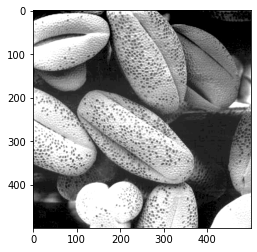

In [5]:
# plotting the grayscale image
plt.imshow(gray, cmap="gray")

In [6]:
def img2prob(image):
    """
    Given an input image (gray scale), it returns the dict {pixel: prob}
    Assuming that intensity level is 256 (8 bit image)
    """
    unique, counts = np.unique(image, return_counts=True)
    
    # set the dictionaty {pixel:0}
    prob_dict = {i:0 for i in range(0,256)}
    for (pixel_value, count) in zip(unique, counts):
        prob_dict[pixel_value] = count
    
    #convert from freq to prob
    prob_dict = {k:v / sum(prob_dict.values()) for k,v in prob_dict.items()}
    
    return prob_dict

In [7]:
prob_dict = img2prob(gray)

In [8]:
sum(prob_dict.values())

1.0000000000000002

In [9]:
def plot_histogram(image, y_lim=100):
    plt.figure(figsize = (12,8))
    plt.hist(np.ravel(image), bins=255)
    plt.xlim([-2,255])
    plt.show()

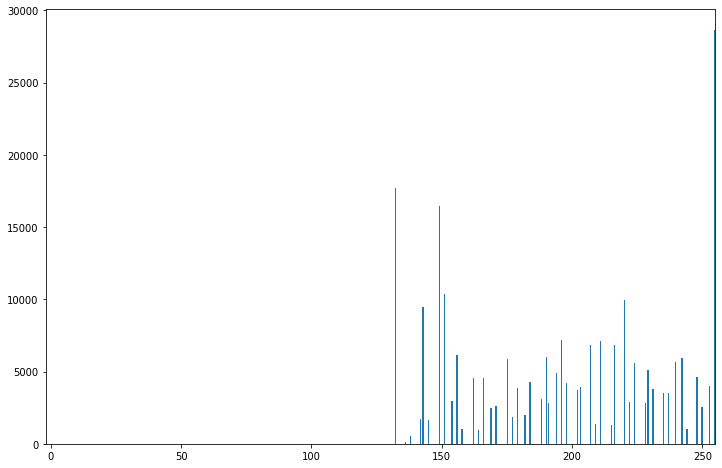

In [10]:
plot_histogram(gray)

In [11]:
def intensity_transform(prob_dict):
    """
    Input: prob_dict(dict) {pixel: prob}
    Output: r2s_mapping {r:s}
    """
    values = list(prob_dict.values())
    s_values = (np.cumsum(values, axis=0) *255).astype('int')
    r2s_mapping = {i:j for (i,j) in zip(range(0,256), s_values)}
    return r2s_mapping

In [12]:
transform_mapping = intensity_transform(prob_dict)

In [13]:
gray.shape

(500, 500)

In [14]:
def r2s(r, mapping_func=transform_mapping):
    return mapping_func[r]

r2s_vectorized = np.vectorize(r2s)

In [15]:
hist_eq_image = np.array(list(map(r2s_vectorized, gray)))

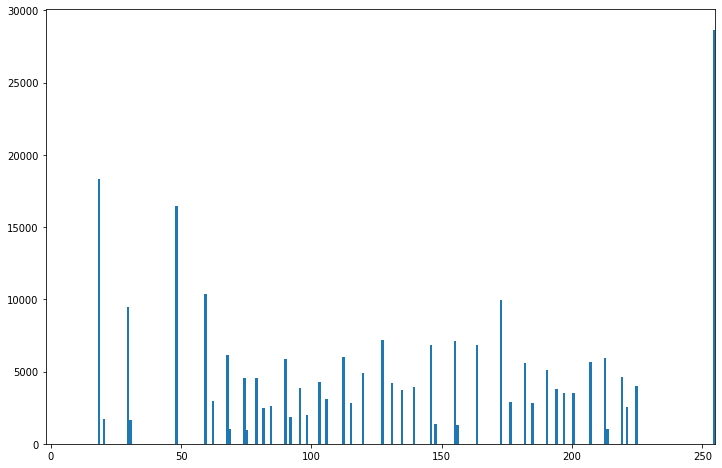

In [16]:
plot_histogram(hist_eq_image)

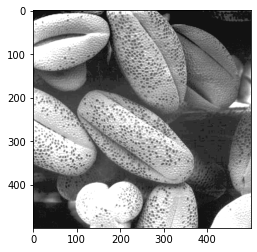

In [17]:
plt.imshow(hist_eq_image, cmap="gray", vmax=255, vmin=0)

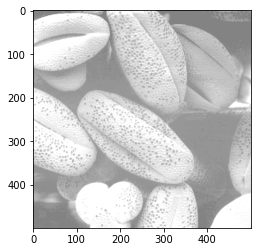

In [18]:
plt.imshow(gray, cmap="gray", vmax=255, vmin=0)

In [31]:
def HistogramEqualization(image,plot_output=True, return_output = False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    prob_dict = img2prob(gray)
    transform_mapping = intensity_transform(prob_dict)
    r2s_vectorized = np.vectorize(r2s)
    hist_eq_image = np.array(list(map(r2s_vectorized, gray)))
    
    if plot_output:
        show_output(gray, hist_eq_image)
    
    if return_output:
        return hist_eq_image

In [32]:
def show_output(orig_img, output):
    plt.figure(figsize = (20,12))
    plt.subplot(2,2,1)
    plt.imshow(orig_img, cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title("Original Image")
    
    plt.subplot(2,2,2)
    plt.hist(np.ravel(orig_img), bins=255)
    plt.title("Histogram of Original Image")
    plt.xlim(-2,256)
    
    plt.subplot(2,2,3)
    plt.imshow(output, cmap="gray", vmin=0, vmax=255)
    plt.title("Image after Histogram Equalizatoin")
    plt.axis("off")
    
    plt.subplot(2,2,4)
    plt.hist(np.ravel(output), bins=255)
    plt.xlim(-2,256)
    plt.title("Equalized histogram")

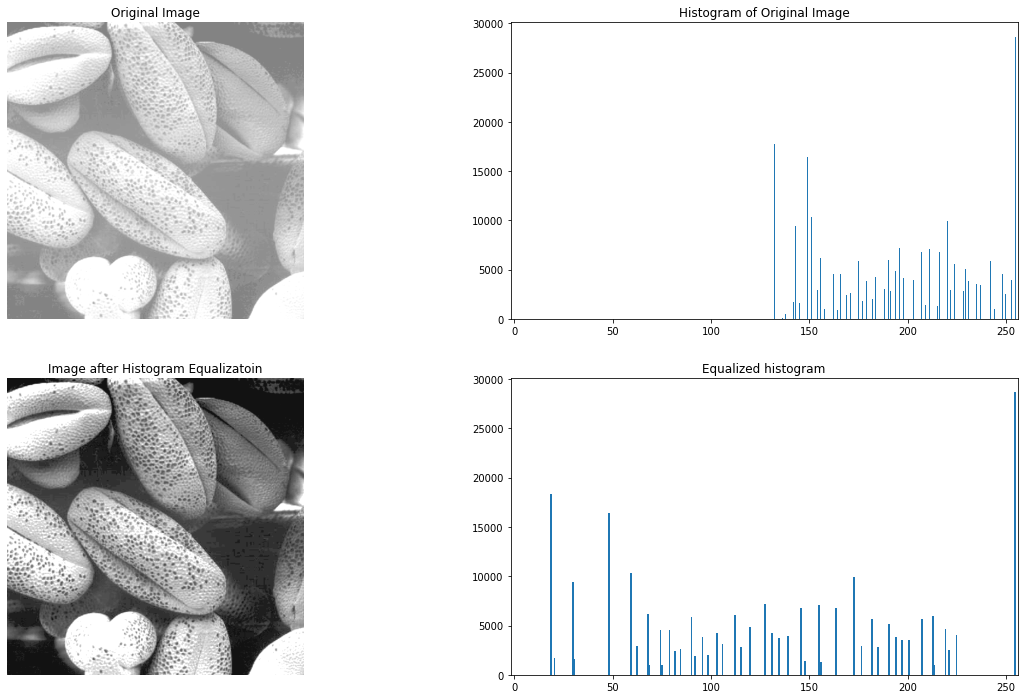

In [33]:
HistogramEqualization(im)

# Comparing it with cv2 built in function

Text(0.5, 1.0, 'Histogram')

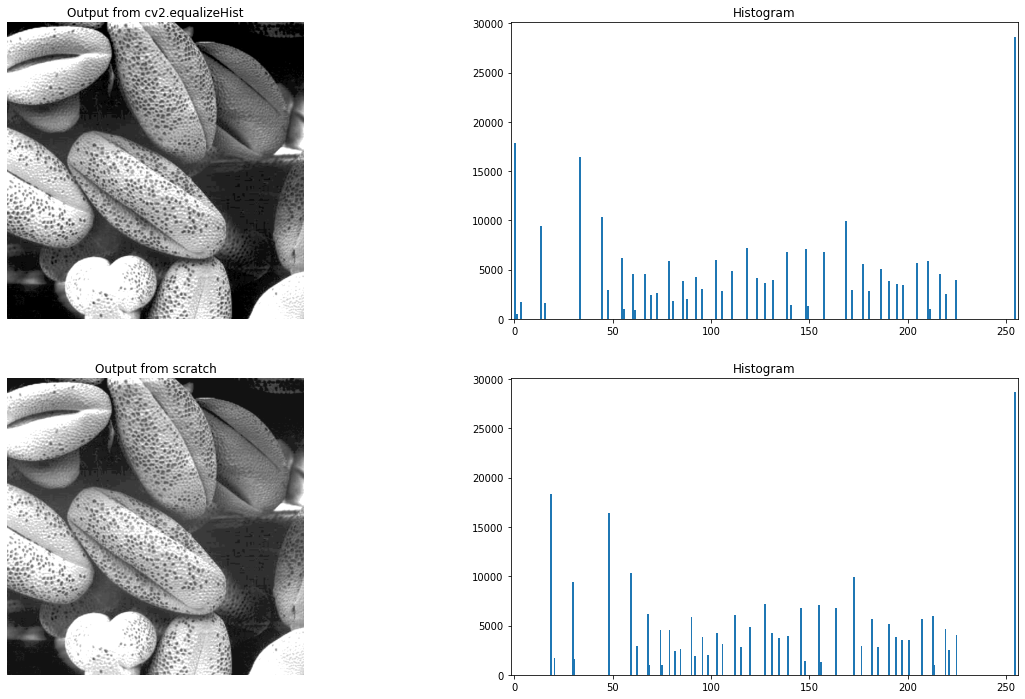

In [39]:
output_cv2 = cv2.equalizeHist(gray)
output_scratch = HistogramEqualization(im,plot_output=False, return_output=True)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.imshow(output_cv2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title("Output from cv2.equalizeHist")

plt.subplot(2,2,2)
plt.hist(np.ravel(output_cv2), bins=255)
plt.title("Histogram")
plt.xlim(-2,256)

plt.subplot(2,2,3)
plt.imshow(output_scratch, cmap="gray", vmin=0, vmax=255)
plt.title("Output from scratch")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(np.ravel(output_scratch), bins=255)
plt.xlim(-2,256)
plt.title("Histogram")

We can see from the graphs above that the histogram of the image obtained from using cv2.equalizeHist() and the histogram of the image we obtained by our code that we wrote from scratch are actually pretty similar. 